In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [106]:
#url = 'C:/Users/lihi/OneDrive - ariel.ac.il/Ariel_Teachings/a_intro to data analysis/b_units of code/data/fitness analysis.csv'
#fit_df = pd.read_csv(url)
#fit_df.head(2)
url='violence_data.csv'
data_df = pd.read_csv(url)
data_df.columns
#DONT USE THIS WAY CAUSE IS IN MY PC AND NO ONE CAN SEE IT

Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value'],
      dtype='object')

CORRECT WAY OF CALLING THE DATA

In [107]:
url2= 'https://raw.githubusercontent.com/orifelszer/project/main/violence_data.csv'
data_df2= pd.read_csv(url2)
just_women= data_df2.loc[data_df2.Gender== 'F']
just_women

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12505,210,Zimbabwe,F,Residence,Urban,... if she goes out without telling him,01/01/2015,14.2
12506,280,Zimbabwe,F,Residence,Rural,... if she neglects the children,01/01/2015,24.3
12507,280,Zimbabwe,F,Residence,Urban,... if she neglects the children,01/01/2015,16.7
12508,350,Zimbabwe,F,Residence,Rural,... if she refuses to have sex with him,01/01/2015,18.2


In [108]:
demographics_df = data_df2.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
demographics_df.columns = ["Question", "Response", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per demographic group")
demographics_df.sort_values(["Question", "Median"])

Violence % median, min, max, and mean per demographic group


,Question,Response,Median,Max,Min,Mean
2,Age,35-49,14.15,81.0,0.2,19.336412
1,Age,25-34,14.45,81.5,0.1,19.703562
0,Age,15-24,17.50,80.1,0.1,21.084169
3,Education,Higher,4.20,74.6,0.0,8.898670
6,Education,Secondary,13.05,76.7,0.2,17.378892
5,Education,Primary,18.40,80.5,0.1,22.819093
4,Education,No education,21.55,82.0,0.0,25.403125
9,Employment,Unemployed,14.55,80.1,0.0,19.539710
7,Employment,Employed for cash,14.85,81.5,0.1,19.553804
8,Employment,Employed for kind,20.15,86.9,0.3,24.445541


In [109]:
demographics_df = data_df2.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "mean"]).reset_index()
demographics_df.columns = ["Question", "Response", "Median", "Mean"]
print("Violence % median, and mean per demographic group")
demographics_df.sort_values(["Question", "Median"])

Violence % median, and mean per demographic group


,Question,Response,Median,Mean
2,Age,35-49,14.15,19.336412
1,Age,25-34,14.45,19.703562
0,Age,15-24,17.50,21.084169
3,Education,Higher,4.20,8.898670
6,Education,Secondary,13.05,17.378892
5,Education,Primary,18.40,22.819093
4,Education,No education,21.55,25.403125
9,Employment,Unemployed,14.55,19.539710
7,Employment,Employed for cash,14.85,19.553804
8,Employment,Employed for kind,20.15,24.445541


In [110]:
question_df = data_df.groupby(["Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
question_df.columns = ["Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per question asked")
question_df.sort_values(["Median"])

Violence % median, min, max, and mean per question asked


,Question,Median,Max,Min,Mean
2,... if she burns the food,6.4,56.7,0.0,9.203445
5,... if she refuses to have sex with him,9.0,68.7,0.0,13.209613
1,... if she argues with him,15.7,76.5,0.0,18.983652
3,... if she goes out without telling him,16.4,77.0,0.0,20.046321
4,... if she neglects the children,20.8,75.6,0.0,23.461249
0,... for at least one specific reason,31.0,86.9,0.0,33.217152


In [111]:
countries= data_df.groupby(["Country","Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
countries

,Country,Question,median,max,min,mean
0,Afghanistan,... for at least one specific reason,74.05,86.9,48.8,73.203571
1,Afghanistan,... if she argues with him,49.00,60.6,31.4,49.582143
2,Afghanistan,... if she burns the food,10.65,20.8,4.5,12.264286
3,Afghanistan,... if she goes out without telling him,62.30,69.3,36.5,60.310714
4,Afghanistan,... if she neglects the children,32.60,50.6,19.6,36.425000
...,...,...,...,...,...,...
415,Zimbabwe,... if she argues with him,15.15,26.4,2.4,15.300000
416,Zimbabwe,... if she burns the food,7.35,17.0,1.1,7.080000
417,Zimbabwe,... if she goes out without telling him,21.30,37.8,2.9,20.466667
418,Zimbabwe,... if she neglects the children,20.10,33.3,4.6,20.096667


In [112]:
demoq_df = data_df.groupby(["Demographics Question", "Demographics Response", "Question"])["Value"].agg(["median", "mean"]).reset_index()
demoq_df.columns = ["Demographics Question", "Demographics Response", "Question", "Median", "Mean"]
print("Violence % median, and mean per demographic group and question asked")
demoq_df = demoq_df.sort_values(["Demographics Question", "Demographics Response", "Median"])
demoq_df.head()

Violence % median, and mean per demographic group and question asked


,Demographics Question,Demographics Response,Question,Median,Mean
2,Age,15-24,... if she burns the food,8.50,10.098387
5,Age,15-24,... if she refuses to have sex with him,10.05,13.404762
3,Age,15-24,... if she goes out without telling him,18.40,21.026562
1,Age,15-24,... if she argues with him,18.65,20.304032
4,Age,15-24,... if she neglects the children,23.20,25.306250


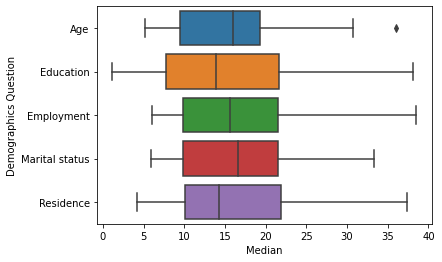

In [113]:
myBoxplot= demoq_df[['Median','Demographics Question']]
ax= sns.boxplot( data= myBoxplot, x='Median',y='Demographics Question')

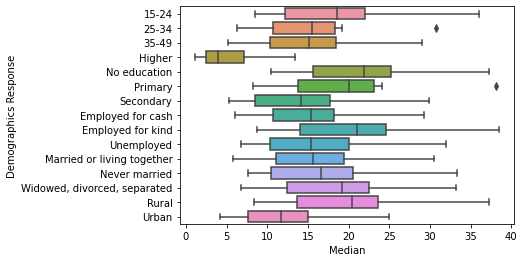

In [114]:
myBarPlot= demoq_df[['Median','Demographics Response','Demographics Question']]
ax2= sns.boxplot( data= myBarPlot, x='Median',y='Demographics Response')

<AxesSubplot:xlabel='Median', ylabel='Demographics Question'>

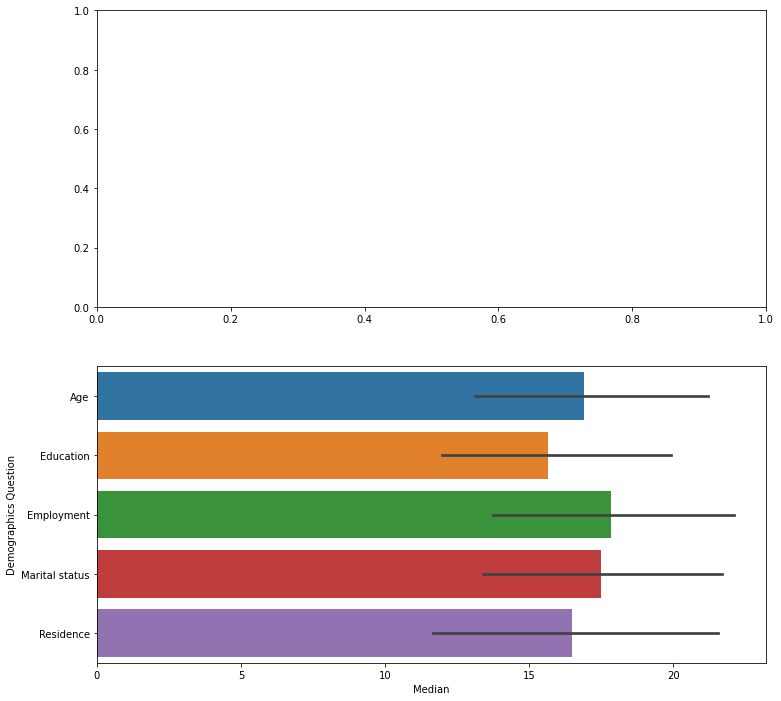

In [115]:
fig, axes = plt.subplots(2,1, figsize=(12, 12))
MyOrder= ['ax3','ax4']
plt.subplots_adjust(wspace = 0.3)
#sns.boxplot( data= myBarPlot, x='Median',y='Demographics Response')
#sns.histplot(x="Value", hue="Demographics Response",  data=data_df2)
sns.barplot(data=myBarPlot, x = "Median", y='Demographics Question')

In [116]:
question_df2 = data_df2.groupby(["Country","Question"])["Value"].agg(["median", "max", "min", "mean"])

In [117]:
data_df2.pivot_table('Value', index='Country', columns='Demographics Question', aggfunc='median') 

Demographics Question,Age,Education,Employment,Marital status,Residence
Country,,,,,
Afghanistan,46.55,41.05,47.95,39.80,46.35
Albania,3.60,4.00,3.85,3.95,3.40
Angola,12.10,10.80,12.05,12.40,11.90
Armenia,6.80,6.35,8.15,6.25,6.70
Azerbaijan,34.80,35.65,34.35,32.15,35.25
...,...,...,...,...,...
Uganda,23.05,20.05,26.35,26.25,22.05
Ukraine,2.25,2.30,3.00,2.20,2.70
Yemen,30.85,20.15,27.90,30.30,23.90


In [118]:
hola= data_df2.pivot_table('Value', index='Country', columns='Demographics Response') 
hola

Demographics Response,15-24,25-34,35-49,Employed for cash,Employed for kind,Higher,Married or living together,Never married,No education,Primary,Rural,Secondary,Unemployed,Urban,"Widowed, divorced, separated"
Country,,,,,,,,,,,,,,,
Afghanistan,44.875000,45.158333,44.958333,44.833333,46.850000,30.166667,45.108333,NaN,47.408333,42.675000,46.883333,41.016667,43.708333,38.541667,35.383333
Albania,3.666667,4.316667,4.775000,3.508333,6.508333,1.591667,4.700000,3.441667,15.791667,6.300000,5.408333,3.750000,4.791667,3.575000,9.141667
Angola,13.591667,12.366667,12.458333,13.141667,15.650000,2.550000,13.266667,11.775000,19.600000,16.775000,20.108333,8.958333,11.200000,9.950000,16.641667
Armenia,8.400000,8.458333,8.375000,8.308333,19.233333,5.141667,8.433333,8.116667,NaN,10.066667,12.675000,11.416667,7.225000,5.316667,12.583333
Azerbaijan,32.566667,33.391667,31.366667,29.800000,34.925000,18.633333,32.975000,30.783333,55.516667,44.016667,39.950000,34.441667,32.666667,26.341667,29.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,29.741667,22.433333,22.600000,24.475000,29.450000,10.083333,23.891667,27.966667,27.575000,30.283333,28.066667,20.858333,28.258333,19.016667,27.908333
Ukraine,2.516667,4.000000,3.558333,3.416667,4.475000,2.375000,2.808333,3.300000,NaN,NaN,4.366667,4.466667,3.200000,3.000000,6.516667
Yemen,27.933333,29.466667,31.933333,22.150000,39.900000,10.316667,30.916667,26.683333,37.250000,28.350000,34.550000,17.583333,29.300000,19.166667,28.816667


In [119]:
data_df2.dropna()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
5,1,Afghanistan,F,Employment,Employed for kind,... if she burns the food,01/01/2015,17.0
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


In [120]:
data_df = data_df2.dropna()
data_df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
5,1,Afghanistan,F,Employment,Employed for kind,... if she burns the food,01/01/2015,17.0
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


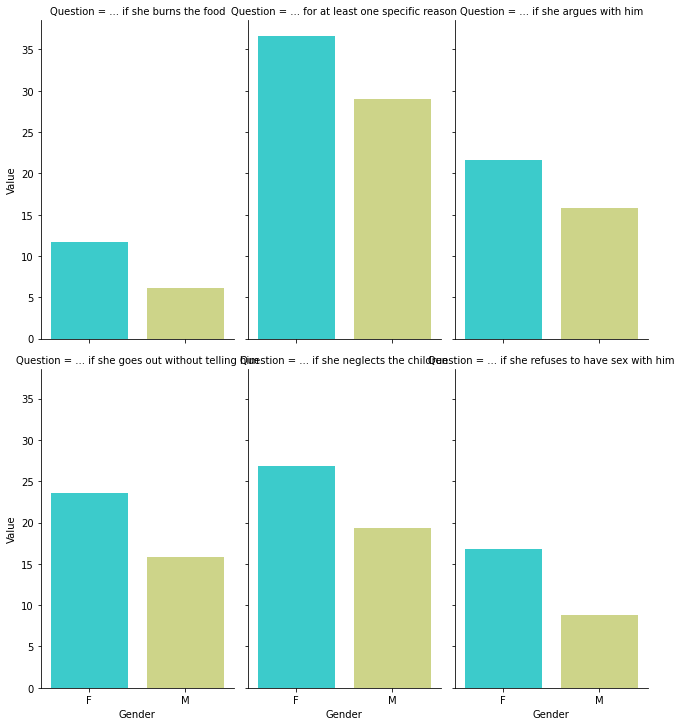

In [121]:
g = sns.catplot(x="Gender", y="Value", col="Question",
                data=data_df, saturation=.8,
                kind="bar", ci=None, aspect=.6, col_wrap=3, palette = 'rainbow')